In [1]:
#this analysis is for those that score platinum and achieve on-site renewable energy. Where are they? Any similarities? 

In [2]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import psycopg2
import pandas.io.sql as pdsql
import plotly.plotly as py
from plotly.graph_objs import *
import seaborn as sns

In [3]:
%matplotlib inline 

In [4]:
df_leed_2009 = pd.read_pickle('leed_2009_w_credits.pickle')

In [32]:
eac2_all = df_leed_2009[(df_leed_2009['eac2'] > 0) & (df_leed_2009['Country'] == 'US')]

In [75]:
eac2_all.shape

(579, 124)

In [34]:
eac2_all_by_state = eac2_all.groupby("State").count().loc[:,"ID"]

In [36]:
eac2_all_by_state = eac2_all_by_state.to_frame()

In [38]:
eac2_all_by_state["State"] = eac2_all_by_state.index

In [41]:
df = eac2_all_by_state

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['State'],
        z = df['ID'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Number of Projects"
        )
    ) ]

layout = dict(
        title = 'On-site Renewable Energy',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )
layout.update(margin=Margin(l=0,r=0,b=0,t=0,pad=0,autoexpand=True))   
fig = dict( data=data, layout=layout )

py.iplot( fig, validate=False, filename='LEED-EAc2-renewable-energy-map' )

#By Cert level

In [76]:
eac2_all_by_cert = eac2_all.groupby('CertLevel').count()

In [77]:
eac2_all_by_cert

,ID,Isconfidential,ProjectName,Street,City,State,Zipcode,Country,LEEDSystemVersionDisplayName,PointsAchieved,...,ssc5_1_possible,ssc5_2_possible,ssc6_1_possible,ssc6_2_possible,ssc7_1_possible,ssc7_2_possible,ssc8_possible,wec1_possible,wec2_possible,wec3_possible
CertLevel,,,,,,,,,,,,,,,,,,,,,
Certified,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
Gold,272,272,272,272,272,272,272,272,272,272,...,272,272,272,272,272,272,272,272,272,272
Platinum,136,136,136,136,136,136,136,136,136,136,...,136,136,136,136,136,136,136,136,136,136
Silver,137,137,137,137,137,137,137,137,137,137,...,137,137,137,137,137,137,137,137,137,137


#California and Platinum

In [42]:
eac2_cali_all = df_leed_2009[(df_leed_2009['eac2'] > 0) & (df_leed_2009['Country'] == 'US') & (df_leed_2009['State'] == 'CA')]

In [45]:
eac2_cali_all.shape

(137, 124)

In [46]:
eac2_cali_all_by_owner = eac2_cali_all.groupby('OwnerTypes').count()["ID"]

In [47]:
eac2_cali_all_by_owner = eac2_cali_all_by_owner.to_frame()

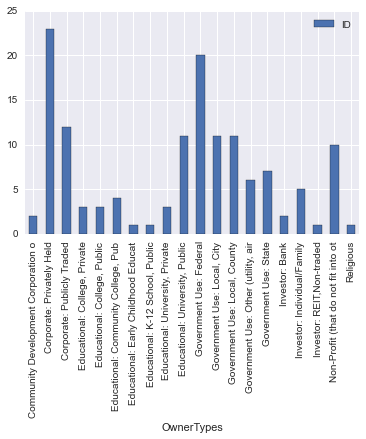

In [48]:
eac2_cali_all_by_owner.plot(kind='bar')

In [53]:
eac2_cali_all_by_owner

,ID
OwnerTypes,
Community Development Corporation o,2
Corporate: Privately Held,23
Corporate: Publicly Traded,12
"Educational: College, Private",3
"Educational: College, Public",3
"Educational: Community College, Pub",4
Educational: Early Childhood Educat,1
"Educational: K-12 School, Public",1
"Educational: University, Private",3


Same as above but using plotly

In [66]:
data = Data([
    Bar(
        x=eac2_cali_all_by_owner.index,
        y=eac2_cali_all_by_owner["ID"],
        marker = Marker(
        color = 'RGB(255, 224, 0)',
    ))
])
layout = Layout(
    title='On-site Renewbale Energy',
)
layout.update(margin=Margin(l=0,r=0,b=100,t=10,pad=0,autoexpand=True))
py.iplot(data, filename='LEED-EAc2-renewables-ownertype-bar')

#by zipcode

In [67]:
eac2_cali_all_by_zip = eac2_cali_all.groupby('Zipcode').count()["ID"]

In [69]:
eac2_cali_all_by_zip = eac2_cali_all_by_zip.to_frame()

In [71]:
eac2_cali_all_by_zip_top = eac2_cali_all_by_zip[eac2_cali_all_by_zip['ID'] > 1]

In [73]:
eac2_cali_all_by_zip_top

,ID
Zipcode,
91125,3
91711,2
92055,2
92115,2
92121,2
92570,2
92620,2
92697,5
93536,2


###all projects by owner type

In [49]:
df_leed_2009_by_owner = df_leed_2009.groupby('OwnerTypes').count()["ID"]

In [51]:
df_leed_2009_by_owner = df_leed_2009_by_owner.to_frame()

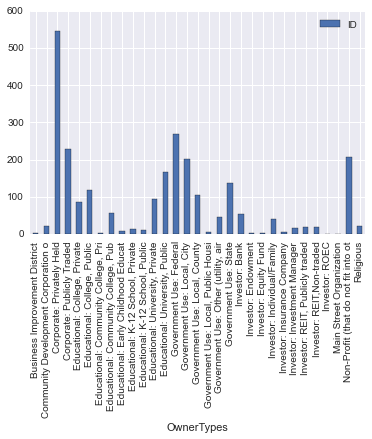

In [52]:
df_leed_2009_by_owner.plot(kind='bar')

##Platinum

In [5]:
eac2 =df_leed_2009[(df_leed_2009['eac2'] > 0) & (df_leed_2009['Country'] == 'US') & (df_leed_2009['CertLevel'] == 'Platinum')]

In [6]:
eac2.shape

(136, 124)

In [7]:
eac2_by_state = eac2.groupby('State').count()["ID"]
eac2_by_state = eac2_by_state.to_frame()
eac2_by_state = eac2_by_state.rename(columns={"ID": "Number of Projects"})

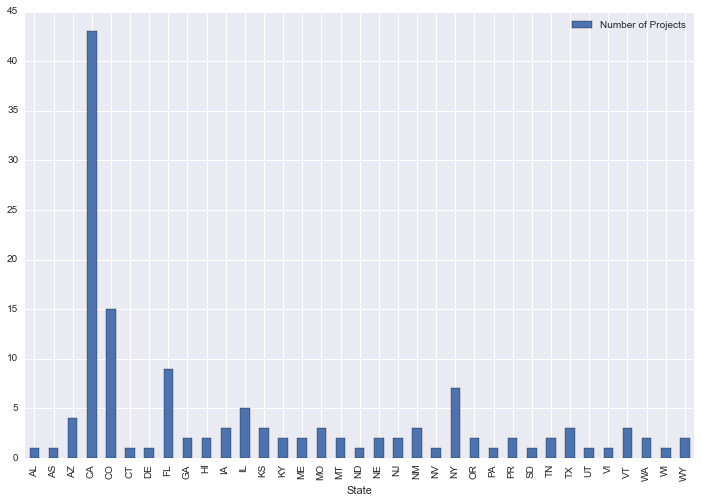

In [9]:
eac2_by_state.plot(kind='bar', figsize=(12,8))

In [20]:
eac2_cali = eac2[eac2['State'] == 'CA']
eac2_cali.shape

(43, 124)

In [27]:
eac2_cali_zip = eac2_cali.loc[:,['ID', 'Zipcode']]

In [29]:
eac2_cali_zip_by_zip = eac2_cali_zip.groupby('Zipcode').count()

In [31]:
eac2_cali_zip_by_zip

,ID
Zipcode,
90221,1
90232,1
90745,1
90806,1
91106,1
91125,2
91204,1
91301,1
91502,1
